In [1]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  
import spear as sp

DATA_PATH    = 'D:\ThesisData\data'
CATALOG_PATH = 'D:\ThesisData/CATALOG.csv'

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['vis','ir069','ir107','vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

# Grab a sample event and view catalog entries
sample_event = events.get_group( event_ids[-1])
print('Sample Event:',event_ids[-1])
sample_event

Found 12739 events matching {'vis', 'vil', 'ir107', 'ir069'}
Sample Event: S858968


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
31740,S858968,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0901_0930.h5,75,vis,2019-09-17 19:54:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,142807.0,858968.0,Thunderstorm Wind,46.167805,...,49.388668,-89.263121,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.033034,1.115368,0.0
45328,S858968,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0701_1...,543,ir107,2019-09-17 19:54:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,142807.0,858968.0,Thunderstorm Wind,46.167805,...,49.388668,-89.263121,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-68.275558,20.554308,0.0
46244,S858968,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0701_1...,544,ir069,2019-09-17 19:54:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,142807.0,858968.0,Thunderstorm Wind,46.167805,...,49.388668,-89.263121,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-68.739433,-23.089878,0.0
50085,S858968,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0701_1231.h5,421,vil,2019-09-17 19:54:00,-119:-114:-109:-104:-99:-94:-89:-84:-79:-74:-6...,142807.0,858968.0,Thunderstorm Wind,46.167805,...,49.388668,-89.263121,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.0
74782,S858968,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0901_1001.h5,0,lght,2019-09-17 19:54:00,NaN,142807.0,858968.0,Thunderstorm Wind,46.167805,...,49.388668,-89.263121,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,453187.000000,0.0


In [ ]:
sample_event

(<matplotlib.image.AxesImage at 0x125e1a5bc90>, Text(0.5, 1.0, 'VIL'))

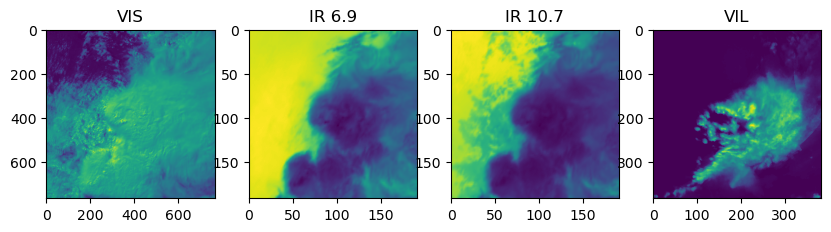

In [2]:
# def read_data( sample_event, img_type, data_path=DATA_PATH ):
#     """
#     Reads single SEVIR event for a given image type.
    
#     Parameters
#     ----------
#     sample_event   pd.DataFrame
#         SEVIR catalog rows matching a single ID
#     img_type   str
#         SEVIR image type
#     data_path  str
#         Location of SEVIR data
    
#     Returns
#     -------
#     np.array
#        LxLx49 tensor containing event data
#     """
#     fn = sample_event[sample_event.img_type==img_type].squeeze().file_name
#     fi = sample_event[sample_event.img_type==img_type].squeeze().file_index
#     with h5py.File(data_path + '/' + fn,'r') as hf:
#         data=hf[img_type][fi] 
#     return data

vis = sp.read_data(sample_event, 'vis')
ir069 = sp.read_data(sample_event, 'ir069')
ir107 = sp.read_data(sample_event, 'ir107')
vil = sp.read_data(sample_event, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')